In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ju"

In [3]:
runs_orig = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_orig["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 100]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA']

In [5]:
runs_orig["first_name"] = runs_orig.name.str.split(" ", expand=True).iloc[:, 0]
runs_df = runs_orig
runs_df.head()

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
0,joni hirvikallio,2018,2,KOOVEE,FIN,5.873,1,6,joni
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni


In [6]:
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()
display(top_first_names)

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'anders',
 'johan',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'petteri',
 'jouko',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'samuli',
 'niko',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'raimo',
 'panu',
 'thomas',
 'stefan',
 'keijo',
 'per',
 'magnus',
 'simon',
 'pentti',
 'sak

In [7]:
# Temporarily remove 2018 in order to try predict it in other notebook
#runs_df = runs_df[runs_df.year != 2018]
#runs_df

In [8]:
features = shared.preprocess_features(runs_df, top_countries, ve_or_ju)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76531 entries, 0 to 76530
Data columns (total 9 columns):
name            76531 non-null object
year            76531 non-null int64
team_id         76531 non-null int64
team            76531 non-null object
team_country    75583 non-null object
pace            76531 non-null float64
leg_nro         76531 non-null int64
num_runs        76531 non-null int64
first_name      76531 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 5.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 3 columns):
first_name           1586 non-null object
fn_pace_class        1587 non-null int64
fn_pace_std_class    1587 non-null int64
dtypes: int64(2), object(1)
memory usage: 37.3+ KB


None

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,2,0.301030,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16,1.204120,256,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,143,2.155336,20449,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,12,1.079181,144,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37,1.568202,1369,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2,0.301030,4,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0.000000,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,9,0.954243,81,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,12,1.079181,144,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,21,1.322219,441,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 76531 entries, 0 to 76530
Data columns (total 47 columns):
team_id                  76531 non-null Sparse[int64, nan]
team_id_log10            76531 non-null Sparse[float64, nan]
team_id_square           76531 non-null Sparse[int64, nan]
leg_1                    76531 non-null Sparse[uint8, 0]
leg_2                    76531 non-null Sparse[uint8, 0]
leg_3                    76531 non-null Sparse[uint8, 0]
leg_4                    76531 non-null Sparse[uint8, 0]
leg_5                    76531 non-null Sparse[uint8, 0]
leg_6                    76531 non-null Sparse[uint8, 0]
leg_7                    76531 non-null Sparse[uint8, 0]
c_DEN                    76531 non-null Sparse[uint8, 0]
c_EST                    76531 non-null Sparse[uint8, 0]
c_FIN                    76531 non-null Sparse[uint8, 0]
c_FRA                    76531 non-null Sparse[uint8, 0]
c_GBR                    76531 non-null Sparse[uint8, 0]
c_GER          

In [10]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(76531, 47)

(76531, 1)

In [11]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(61224, 47)

In [13]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [14]:
y_train.shape

(61224, 1)

Shapes: y_test=(15307, 1) y_pred=(15307,)
Mean squared error: 5.344
Explained variance score: 0.400


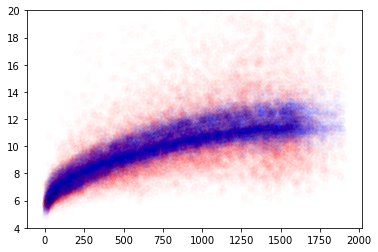

CPU times: user 1.54 s, sys: 441 ms, total: 1.98 s
Wall time: 797 ms


In [15]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [16]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,4.110234e-04
1,team_id_log10,1.147531e-01
2,team_id_square,-1.368725e-07
3,leg_1,-7.255919e-02
4,leg_2,-2.741299e-02
5,leg_3,-2.158852e-02
6,leg_4,5.670481e-02
7,leg_5,8.127733e-02
8,leg_6,2.533448e-02
9,leg_7,-4.175593e-02


      Iter       Train Loss   Remaining Time 
         1           0.0633           16.11m
         2           0.0587           16.48m
         3           0.0550           16.24m
         4           0.0518           16.20m
         5           0.0492           16.19m
         6           0.0471           16.11m
         7           0.0452           16.07m
         8           0.0437           15.94m
         9           0.0424           15.99m
        10           0.0414           15.93m
        20           0.0365           15.65m
        30           0.0349           14.87m
        40           0.0341           14.23m
        50           0.0337           13.95m
        60           0.0334           13.69m
        70           0.0332           13.57m
        80           0.0330           13.42m
        90           0.0329           13.29m
       100           0.0328           13.18m
       200           0.0322           12.23m
       300           0.0319           11.83m
       40

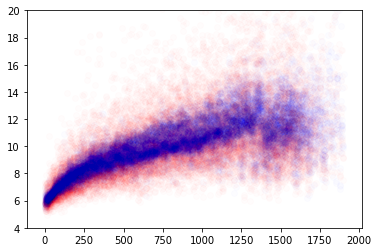

CPU times: user 12min 1s, sys: 965 ms, total: 12min 2s
Wall time: 12min 3s


In [17]:
%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [18]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0570            6.82m
         2           0.0546            6.78m
         3           0.0525            6.74m
         4           0.0507            6.77m
         5           0.0493            6.74m
         6           0.0479            6.75m
         7           0.0468            6.76m
         8           0.0459            6.78m
         9           0.0450            6.78m
        10           0.0444            6.79m
        20           0.0413            6.75m
        30           0.0401            6.89m
        40           0.0396            6.86m
        50           0.0393            6.77m
        60           0.0392            6.69m
        70           0.0391            6.61m
        80           0.0390            6.55m
        90           0.0389            6.45m
       100           0.0389            6.38m
       200           0.0386            5.94m
       300           0.0384            5.66m
       40

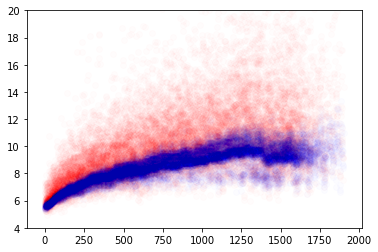

In [19]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0647            8.01m
         2           0.0625            8.04m
         3           0.0607            7.99m
         4           0.0592            8.04m
         5           0.0577            7.98m
         6           0.0565            7.98m
         7           0.0554            7.97m
         8           0.0545            7.96m
         9           0.0537            7.98m
        10           0.0530            7.98m
        20           0.0490            7.75m
        30           0.0475            7.45m
        40           0.0467            7.20m
        50           0.0463            7.05m
        60           0.0461            6.89m
        70           0.0459            6.78m
        80           0.0458            6.67m
        90           0.0457            6.55m
       100           0.0456            6.48m
       200           0.0452            6.00m
       300           0.0450            5.63m
       40

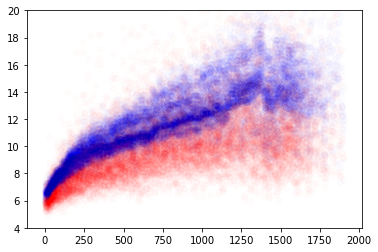

In [20]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [21]:
joblib.dump(gbr, f'gbr_{ve_or_ju}.sav')
joblib.dump(gbr_q_low, f'gbr_q_low_{ve_or_ju}.sav')
joblib.dump(gbr_q_high, f'gbr_q_high_{ve_or_ju}.sav')


['gbr_q_high_ju.sav']

In [22]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [23]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
# Intentionally don't use log scale for calculation to get bigger std 
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,std,std_correct,abs_error,abs_error_in_stds
15292,10.385,17.575,13.130,16.626,False,True,True,3.120,1.265,4.445,1.254
15293,8.734,10.949,10.006,11.729,False,False,False,1.498,1.159,0.943,0.296
15294,6.291,6.672,6.832,7.778,False,False,False,0.744,1.112,0.160,0.053
15295,10.511,13.673,13.832,18.499,False,False,False,3.994,1.327,0.159,0.042
15296,7.413,8.632,8.749,10.484,False,False,False,1.535,1.189,0.117,0.036
15297,8.010,8.447,9.104,10.560,False,False,False,1.275,1.148,0.657,0.208
15298,5.691,7.385,6.337,7.152,False,True,True,0.731,1.121,1.048,0.342
15299,9.297,8.509,10.882,13.100,True,False,True,1.902,1.187,2.373,0.724
15300,8.549,12.159,9.864,11.488,False,True,True,1.469,1.159,2.295,0.720
15301,7.898,12.132,10.218,11.869,False,True,True,1.985,1.226,1.914,0.562


0.15862023910629125

0.1619520480825766

0.3205722871888678

1.7887659475180018

1.1843256655796832

0.4486922075425686

In [24]:
np.exp(1.138)

3.1205210778255728

In [25]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])